**Using Tensorflow Model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

**Load MNIST dataset from Keras**

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Flatten images and normalize pixel values**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255.0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255.0

**Convert labels to one-hot encoding**

In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels)

In [ ]:
test_labels_one_hot = keras.utils.to_categorical(test_labels)

**Build and compile the Keras model**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the model**

In [ ]:
model.fit(train_images, train_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2515 - accuracy: 0.9301
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2498 - accuracy: 0.9312
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9316
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2463 - accuracy: 0.9316
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2452 - accuracy: 0.9320
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2435 - accuracy: 0.9327
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2427 - accuracy: 0.9331
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2420 - accuracy: 0.9330
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2414 - accuracy: 0.9336
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

**Plot training loss over epochs**

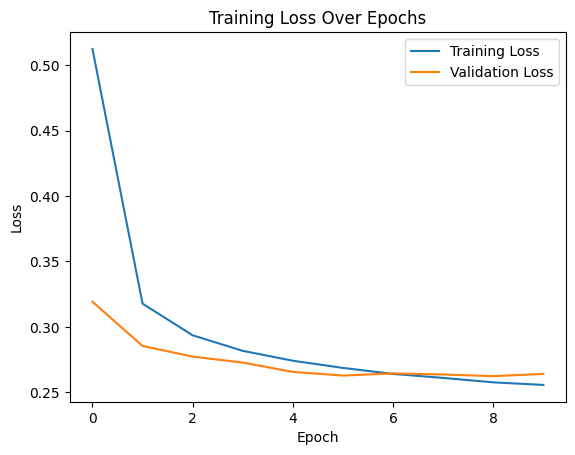

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

**Evaluate on test set**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9283
Test Accuracy: 92.83%


**Now get the value of weights and bias from the model**

In [ ]:
weights, bias = model.get_weights()

In [ ]:
weights

array([[-0.02583133, -0.06048524,  0.05015195, ..., -0.03072277,
         0.02947051, -0.075973  ],
       [ 0.06010053,  0.00857164, -0.07963839, ...,  0.05282132,
        -0.05790387, -0.03364314],
       [ 0.02189776,  0.05383054, -0.04485774, ..., -0.07238714,
         0.01382782, -0.02810681],
       ...,
       [-0.01864058, -0.04278952, -0.01640697, ..., -0.08202218,
         0.04829776,  0.01128567],
       [ 0.07834274, -0.05067512, -0.07895646, ...,  0.01227506,
        -0.01785937,  0.03452981],
       [ 0.03963145, -0.04834564, -0.06329957, ..., -0.05976173,
        -0.00032491, -0.00491056]], dtype=float32)

In [ ]:
bias

array([-0.668544  ,  0.9317844 ,  0.17258655, -0.5773083 ,  0.23114362,
        1.8501116 , -0.32005754,  1.0340322 , -1.9593995 , -0.4749263 ],
      dtype=float32)

**Design a Neural Network of MNIST dataset on plain python.**

**Import Libraires**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset Loading**

In [ ]:
train = pd.read_csv('/content/mnist_train.csv')

In [ ]:
test = pd.read_csv('/content/mnist_test.csv')

In [ ]:
train_labels = train['label']

In [ ]:
train_images = train.drop('label', axis=1)

In [ ]:
test_labels = test['label']

In [ ]:
test_images = test.drop('label', axis=1)

In [ ]:
def log_loss(y_true, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

In [ ]:
def sigmoid_numpy(x):
  return 1.0 / (1.0 + np.exp(-np.clip(x, -700, 700)))

In [ ]:
class myNN:
    def __init__(self):
        self.weights = np.random.randn(train_images.shape[1], 10) * np.sqrt(2 / train_images.shape[1])
        self.bias = np.zeros(10)
    def calculate_accuracy(self, y_true, y_predicted):
        if len(y_true.shape) > 1:
            y_true = np.argmax(y_true, axis=1)
        y_pred_classes = np.argmax(y_predicted, axis=1)
        accuracy = np.mean(y_true == y_pred_classes)
        return accuracy
    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid_numpy(weighted_sum)
        return y_predicted
    def fit(self, X, y, epochs, loss_threshold, learning_rate=0.01, clip_threshold=1.0):
        y_one_hot = pd.get_dummies(y).values
        self.losses = []
        n = len(X)
        for i in range(epochs):
            weighted_sum = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_one_hot, y_predicted)
            wd = (1/n) * np.dot(np.transpose(X), (y_predicted - y_one_hot))
            bias_d = np.mean(y_predicted - y_one_hot)
            wd = np.clip(wd, -clip_threshold, clip_threshold)
            bias_d = np.clip(bias_d, -clip_threshold, clip_threshold)
            self.weights = self.weights - learning_rate * wd
            self.bias = self.bias - learning_rate * bias_d
            self.losses.append(loss)
            if i % 50 == 0:
                accuracy = self.calculate_accuracy(np.argmax(y_one_hot, axis=1), y_predicted)
                print(f'Epoch:{i}, Accuracy: {accuracy}, Loss:{loss}')
            if loss <= loss_threshold:
                accuracy = self.calculate_accuracy(np.argmax(y_one_hot, axis=1), y_predicted)
                print(f'Epoch:{i}, Accuracy: {accuracy}, Loss:{loss}')
                break

In [ ]:
customModel = myNN()

In [ ]:
customModel.fit(train_images, train_labels, epochs=10000, loss_threshold=0.2670)

Epoch:0, Accuracy: 0.6413833333333333, Loss:6.6607441134942444
Epoch:50, Accuracy: 0.6443833333333333, Loss:6.621487652703057
Epoch:100, Accuracy: 0.6472166666666667, Loss:6.588986815033176
Epoch:150, Accuracy: 0.6493833333333333, Loss:6.566140929464076
Epoch:200, Accuracy: 0.6511, Loss:6.546365841413918
Epoch:250, Accuracy: 0.6528166666666667, Loss:6.5306539801414845
Epoch:300, Accuracy: 0.6547333333333333, Loss:6.516879358182999
Epoch:350, Accuracy: 0.6560333333333334, Loss:6.505138736687352
Epoch:400, Accuracy: 0.6572166666666667, Loss:6.494744053729452
Epoch:450, Accuracy: 0.6580833333333334, Loss:6.48436496731674
Epoch:500, Accuracy: 0.6589666666666667, Loss:6.474188246419866
Epoch:550, Accuracy: 0.6597833333333334, Loss:6.463927852554951
Epoch:600, Accuracy: 0.6601, Loss:6.454643228688023
Epoch:650, Accuracy: 0.6605333333333333, Loss:6.446355382094538
Epoch:700, Accuracy: 0.6610666666666667, Loss:6.4384504782075025
Epoch:750, Accuracy: 0.6614166666666667, Loss:6.430330982673904
E

**Plotting Training Loss Over Epochs**

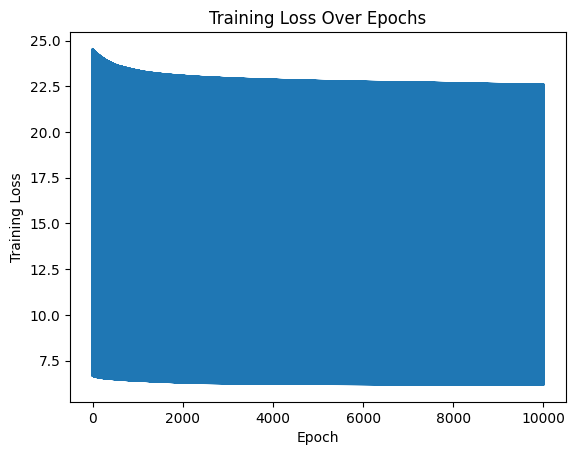

In [ ]:
epochs = len(customModel.losses)
plt.plot(range(1, epochs + 1), customModel.losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()

**Evaluate on Test Set**

In [ ]:
def calculate_accuracy(model, test_images, test_labels):
    predicted_labels = np.argmax(model.predict(test_images), axis=1)
    accuracy = np.mean(predicted_labels == test_labels)
    return accuracy

In [ ]:
test_accuracy = calculate_accuracy(customModel, test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 66.82%
